## Main Task:
The task is to examine the relationship between a number of predictors and whether a family chooses to switch to a well with lower arsenic content (switch = "yes") or not (switch = "no").

### Data Understanding
Dataset **Wells** dealing with arsenic concentration in wells in Bangladesh. The dataset contains 3020 observations, and each observation corresponds to a family whose nearest well contains unsafe levels of arsenic (above 0.5 micrograms per liter)!  
The dataset contains the following features:  

1. "id" - ID-number of an observation
2. "switch" - switch 'yes' = 1, switch 'no' = 0
3. "arsenic" - shows the arsenic level.
4. "dist" - distance to a well.
5. "assoc" - association.
6. "education" - education level.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv("Datasets/wells.csv", sep=' ')

In [11]:
dataset.head()

,id,switch,arsenic,dist,assoc,educ
0,1,1,2.36,16.826000,0,0
1,2,1,0.71,47.321999,0,0
2,3,0,2.07,20.966999,0,10
3,4,1,1.15,21.486000,0,12
4,5,1,1.10,40.874001,1,14


In [ ]:
# Dropping the ID column
dataset = dataset.drop(columns=['id'])

In [15]:
dataset.describe()

,switch,arsenic,dist,assoc,educ
count,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000
mean,0.575166,1.656930,48.331863,0.422848,4.828477
std,0.494400,1.107387,38.478675,0.494093,4.017317
min,0.000000,0.510000,0.387000,0.000000,0.000000
25%,0.000000,0.820000,21.117250,0.000000,0.000000
50%,1.000000,1.300000,36.761499,0.000000,5.000000
75%,1.000000,2.200000,64.041000,1.000000,8.000000
max,1.000000,9.650000,339.531006,1.000000,17.000000


### Descriptive Analysis

In [16]:
# Frequency table
switch_counts = dataset['switch'].value_counts()
print(switch_counts)

switch
1    1737
0    1283
Name: count, dtype: int64


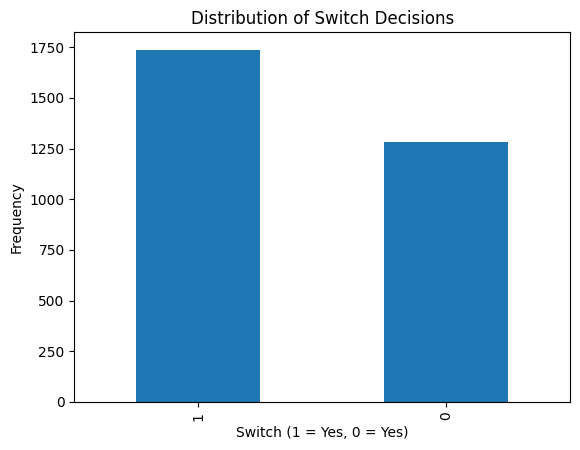

In [19]:
# Bar chart
switch_counts.plot(kind='bar')
plt.title('Distribution of Switch Decisions')
plt.xlabel('Switch (1 = Yes, 0 = Yes)')
plt.ylabel('Frequency')
plt.show()